In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Shape: (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2 

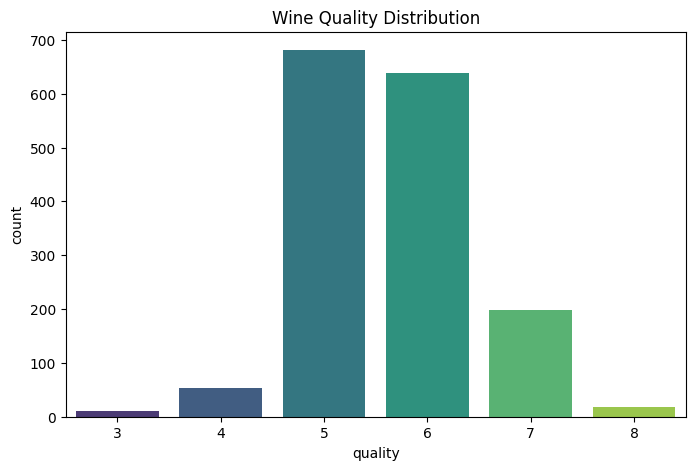

In [2]:
# ==============================
# Wine Quality Prediction
# Regression + Classification
# Dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier

# ==============================
# Load Dataset
# ==============================
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

print("Shape:", df.shape)
print(df.head())

# ==============================
# Preprocessing
# ==============================
X = df.drop("quality", axis=1)
y = df["quality"]

# For classification, convert quality into binary/multi-class
# Let's make binary: Good (quality >= 6) vs Bad (quality < 6)
y_class = (y >= 6).astype(int)

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

# ==============================
# REGRESSION MODELS
# ==============================

print("\n=== Regression Models ===")

# 1. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_lin = lin_reg.predict(X_test_reg)

print("Linear Regression R2:", r2_score(y_test_reg, y_pred_lin))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_lin)))

# 2. Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg)

print("Random Forest R2:", r2_score(y_test_reg, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_rf)))

# 3. XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)
y_pred_xgb = xgb_reg.predict(X_test_reg)

print("XGBoost R2:", r2_score(y_test_reg, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb)))

# ==============================
# CLASSIFICATION MODELS
# ==============================

print("\n=== Classification Models ===")

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf, y_train_clf)
y_pred_log = log_reg.predict(X_test_clf)

print("Logistic Regression Accuracy:", accuracy_score(y_test_clf, y_pred_log))
print(classification_report(y_test_clf, y_pred_log))

# 2. Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test_clf)

print("Random Forest Accuracy:", accuracy_score(y_test_clf, y_pred_rf_clf))
print(classification_report(y_test_clf, y_pred_rf_clf))

# 3. XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
xgb_clf.fit(X_train_clf, y_train_clf)
y_pred_xgb_clf = xgb_clf.predict(X_test_clf)

print("XGBoost Accuracy:", accuracy_score(y_test_clf, y_pred_xgb_clf))
print(classification_report(y_test_clf, y_pred_xgb_clf))

# ==============================
# Visualization
# ==============================
plt.figure(figsize=(8,5))
sns.countplot(x="quality", data=df, palette="viridis")
plt.title("Wine Quality Distribution")
plt.show()
